In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from specialist_data import *
from graph_utils import *
from models.stats.context_stats import ContextStats


Evolution EDA

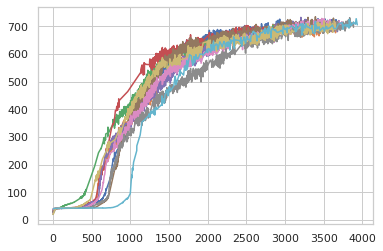

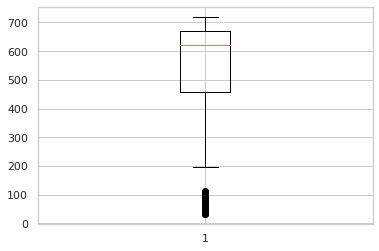

In [17]:
stats = ContextStats('../../data/xdpole', [i+1 for i in range(10)])

s = stats.get_seed(3)
stats.fitness_evolution()

plt.boxplot(s.run_data.avgfit)
plt.show()


Initial Condition EDA

X Boxplots


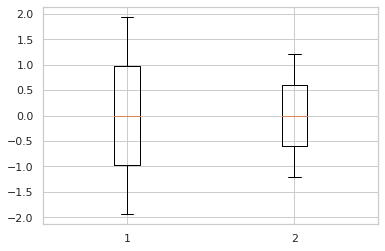

A Boxplots


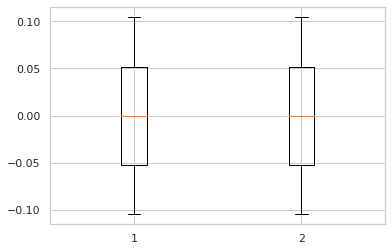

B Boxplots


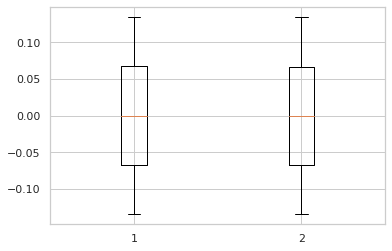

In [18]:
ic_df = transformed.data

print('X Boxplots')
plt.boxplot([ic_df.x1, ic_df.x2], showfliers=False)
plt.show()

print('A Boxplots')
plt.boxplot([ic_df.a1, ic_df.b1], showfliers=False)
plt.show()

print('B Boxplots')
plt.boxplot([ic_df.a2, ic_df.b2], showfliers=False)
plt.show()


Conditions Distribution

In [19]:
last_gens = ic_df.query('index > 10000')

ic_good = last_gens.query('performance == 1000')
ic_bad = last_gens.query('performance < 100')


def dist(col):
    print(col + ' Dist')
    plt.scatter(ic_bad.index, ic_bad[col], s=1, color='orange')
    plt.scatter(ic_good.index, ic_good[col], s=1, color='darkblue')
    plt.show()


print('Last Generations')


# dist('x1')
# dist('x2')
# dist('a1')
# dist('a2')
# dist('b1')
# dist('b2')


Last Generations


In [20]:
first_gens = ic_df.query('index < 10000')

ic_good = first_gens.query('performance > 100')
ic_bad = first_gens.query('performance < 100')

# print('First Generations')

# dist('x1')
# dist('x2')
# dist('a1')
# dist('a2')
# dist('b1')
# dist('b2')


In [21]:
from pandas.plotting import scatter_matrix

# matrix_of_scatterplots = scatter_matrix(
#     transformed.X, alpha=0.2, figsize=(6, 6), diagonal='kde')



Label & Performance Distribution

In [22]:
# generate_hist(ic_df, 'performance')
# generate_hist(ic_df, 'level')


In [23]:
not_bad = ic_df.query('performance > 100')

d1 = not_bad.query('index > 5000 and index < 7000')
d2 = not_bad.query('index > 7000 and index < 8000')
d3 = not_bad.query('index > 8000 and index < 9000')
d4 = not_bad.query('index > 9000 and index < 10000')

divisions = [d1, d2, d3, d4]

# for d in divisions:
    # generate_hist(d, 'performance')


In [26]:
def intervalToTrain(i,slice):
    startToTrain = i*slice
    print((f'index > {startToTrain} and index < {startToTrain+slice}'))
    return transformed.data.query(f'index > {startToTrain} and index < {startToTrain+slice}')

def intervalToTest(i,slice):  
    startToTest = i*slice+slice
    print((f'index > {startToTest} and index < {startToTest+slice}'))  
    return transformed.data.query(f'index > {startToTest} and index < {startToTest+slice}')



In [28]:
from sklearn.ensemble import RandomForestClassifier  

clf = RandomForestClassifier(max_depth=100, random_state=42) 
def iterate(clf):     
    features = ['x1', 'x2', 'a1', 'a2', 'b1', 'b2'] 
    slice = 1000;
    print('slice: ',slice)         
    for i in range(0, 34, 1):         
        #train = transformed.data.query(f'index > {i}000 and index < {i+2}000')
        train = intervalToTrain(i,slice)
        clf = clf.fit(train[features], train.level)          
        #test = transformed.data.query(f'index > {i+2}000 and index < {i+4}000')
        test = intervalToTest(i,slice)
        # pred = clf.predict(test[features])         
        result = clf.score(test[features], test.level)
        print(f'gen [{i} - {i+2}]: {result}')     
        #save to csv and run to 10 seeds
    return clf  
        

clf = iterate(clf) 


slice:  1000
index > 0 and index < 1000
index > 1000 and index < 2000
gen [0 - 2]: 1.0
index > 1000 and index < 2000
index > 2000 and index < 3000
gen [1 - 3]: 1.0
index > 2000 and index < 3000
index > 3000 and index < 4000
gen [2 - 4]: 1.0
index > 3000 and index < 4000
index > 4000 and index < 5000
gen [3 - 5]: 1.0
index > 4000 and index < 5000
index > 5000 and index < 6000
gen [4 - 6]: 1.0
index > 5000 and index < 6000
index > 6000 and index < 7000
gen [5 - 7]: 1.0
index > 6000 and index < 7000
index > 7000 and index < 8000
gen [6 - 8]: 1.0
index > 7000 and index < 8000
index > 8000 and index < 9000
gen [7 - 9]: 1.0
index > 8000 and index < 9000
index > 9000 and index < 10000
gen [8 - 10]: 1.0
index > 9000 and index < 10000
index > 10000 and index < 11000
gen [9 - 11]: 0.7437437437437437
index > 10000 and index < 11000
index > 11000 and index < 12000
gen [10 - 12]: 0.7037037037037037
index > 11000 and index < 12000
index > 12000 and index < 13000
gen [11 - 13]: 0.8308308308308309
ind